## Activity 3 - Dengue Data Analysis
***
Analyst: Jerwin Nico H. Quijano - BSIT3B

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('datasets//dengue.csv')
df.head(10)

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
5,June,2016,Region I,345,1
6,July,2016,Region I,1295,2
7,August,2016,Region I,1598,3
8,September,2016,Region I,1415,3
9,October,2016,Region I,1000,6


In [17]:
df.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [19]:
regional_death = df.groupby('Region')[['Dengue_Cases','Dengue_Deaths']].sum().reset_index()
regional_death

,Region,Dengue_Cases,Dengue_Deaths
0,BARMM,11537,332
1,CAR,30582,1008
2,NCR,115966,4008
3,Region I,59066,157
4,Region II,45141,193
5,Region III,131064,482
6,Region IV-A,163029,652
7,Region IV-B,30849,130
8,Region IX,47781,532
9,Region V,22167,185


In [20]:
regional_death['Mortality Rate'] = np.round((regional_death['Dengue_Deaths'] / regional_death['Dengue_Cases']) * 100, 2)

In [21]:
regional_death

,Region,Dengue_Cases,Dengue_Deaths,Mortality Rate
0,BARMM,11537,332,2.88
1,CAR,30582,1008,3.30
2,NCR,115966,4008,3.46
3,Region I,59066,157,0.27
4,Region II,45141,193,0.43
5,Region III,131064,482,0.37
6,Region IV-A,163029,652,0.40
7,Region IV-B,30849,130,0.42
8,Region IX,47781,532,1.11
9,Region V,22167,185,0.83


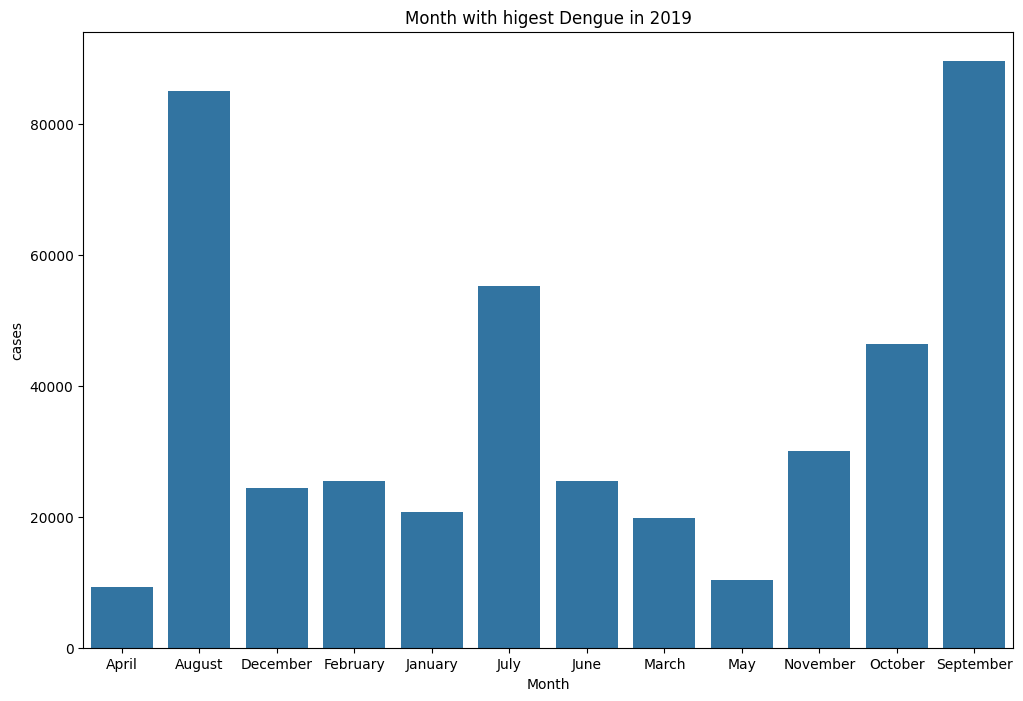

In [22]:
dengue_2019 = df[df['Year'] == 2019]
cases_by_month = dengue_2019.groupby('Month')['Dengue_Cases'].sum().reset_index(name = 'cases')
sns.barplot(data = cases_by_month, y = 'cases', x = 'Month')
plt.gcf().set_size_inches(12,8)
plt.title('Month with higest Dengue in 2019')
plt.show()

## 1. Insight
***
In 2019, The month with the Highest degue cases is in the month of August followed by July. As you can see there is a pattern, From June to December has likely the start of the rainy season in the philippines.

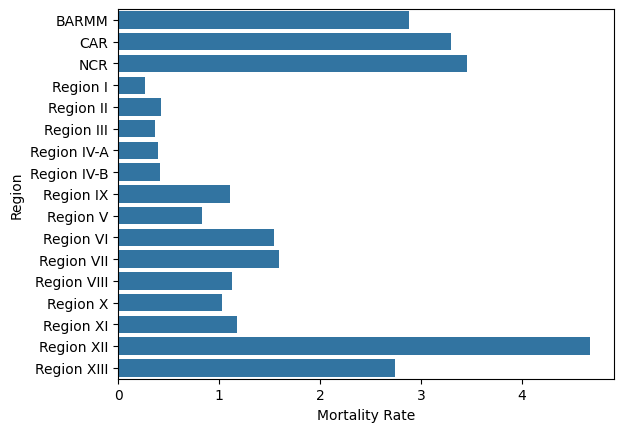

In [23]:
sns.barplot(data = regional_death, orient = 'h', y = 'Region', x = 'Mortality Rate')
plt.show()

## 2. Insight
***
As per the bar plot, it shows that in overall dengue deaths NCR takes the cake with atleast 3.5% mortality rate, probably because that NCR floods alot thus creating a perfect breeding ground for mosquitos, and lastly aslo it might because of heavy rain that NCR always experience.

## 3. Insight
***
As per region, this will likey cause by the extereme poverty of the region, lack of access to health care facilities, lastly because of they are lacking resources to prevent dengue.

## 4. Insight
***
As per region 6, it shows atleast 1.5% deaths likely due to poor waste management and stagnant water thus creating a perfect breeding ground for mosquitos.

## 5. Insight
***
As per region 7, it likely cause by poor health care system and limited access to immediate medical treatment, especially in the far rural areas, and also add the rainy season thus also creating a perfect breeding ground for mosquitos.

df.info()

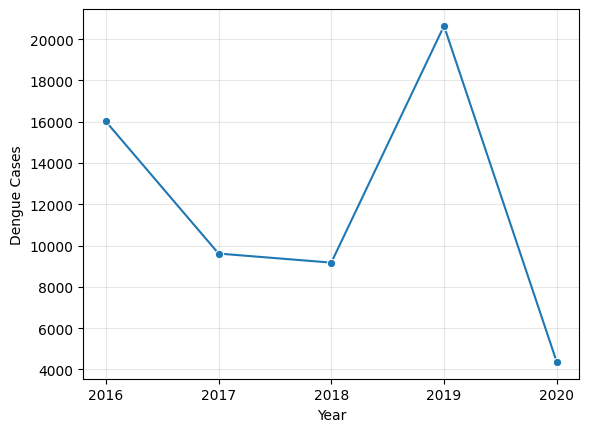

In [24]:
region_12 = df[df['Region'] == 'Region XII']
dengue_trend = region_12.groupby(['Year'])['Dengue_Cases'].sum().reset_index(name = 'dengue case')
sns.lineplot(data = dengue_trend, x = 'Year', y = 'dengue case', marker = 'o')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.xticks(dengue_trend['Year'].unique())
plt.grid(alpha = 0.3)
plt.show()

## 6. Insight
***
In Region XII, dengue cases peaked in 2019, marking a significant surge likely linked to the nationwide dengue outbreak during that year. This period also coincided with the public controversy surrounding the Dengvaxia vaccine, which may have affected vaccination confidence and overall dengue prevention efforts.

## 7. Insight
***
In Region XII, dengue cases dropped in 2020, likely due to the COVID-19 pandemic. People were more cautious, stayed indoors, and practiced better hygiene, that may have reduced mosquito exposure and dengue transmission.

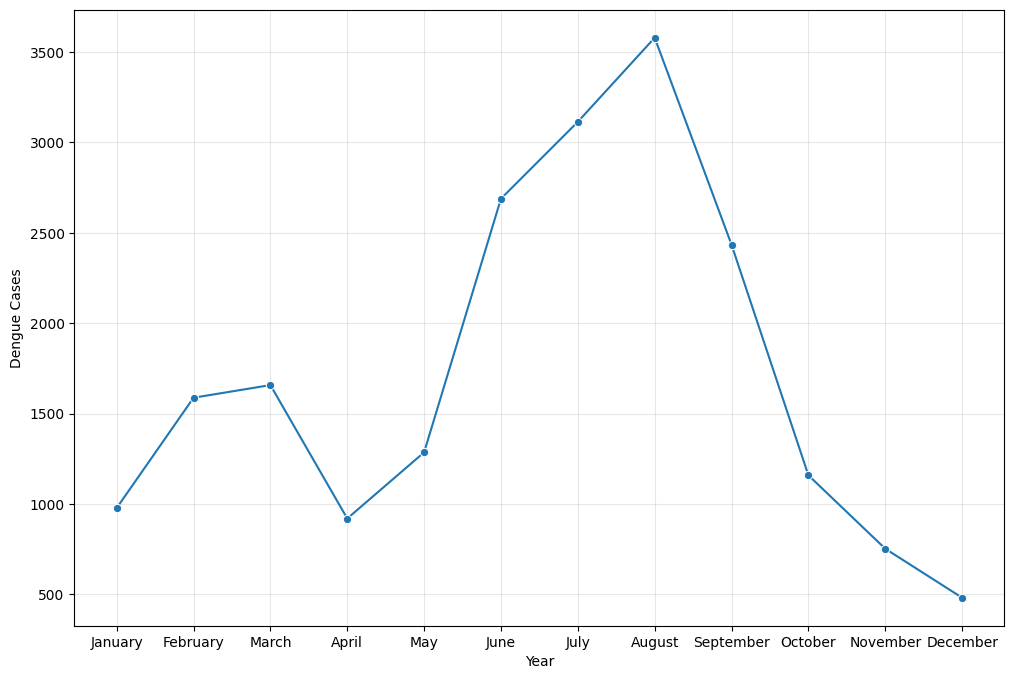

In [25]:
region_12_2019 = region_12[region_12['Year'] == 2019]

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

dengue_2019 = region_12_2019.groupby(['Year', 'Month'])['Dengue_Cases'].sum().reset_index(name='dengue case')
dengue_2019['Month'] = pd.Categorical(dengue_2019['Month'], categories=month_order, ordered=True)

plt.gcf().set_size_inches(12,8)
sns.lineplot(data = dengue_2019, x = 'Month', y = 'dengue case', marker = 'o')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.grid(alpha = 0.3)
plt.show()

## 8. Insight
***
Dengue cases in Region XII peaked around August 2019, which aligns with the rainy season when stagnant water creates ideal mosquito breeding sites.

## 9. Insight
***
A noticeable drop in cases followed after the peak months, likely due to intensified government response such as fogging operations, cleanup drives, and public awareness campaigns launched during the nationwide dengue outbreak that year.

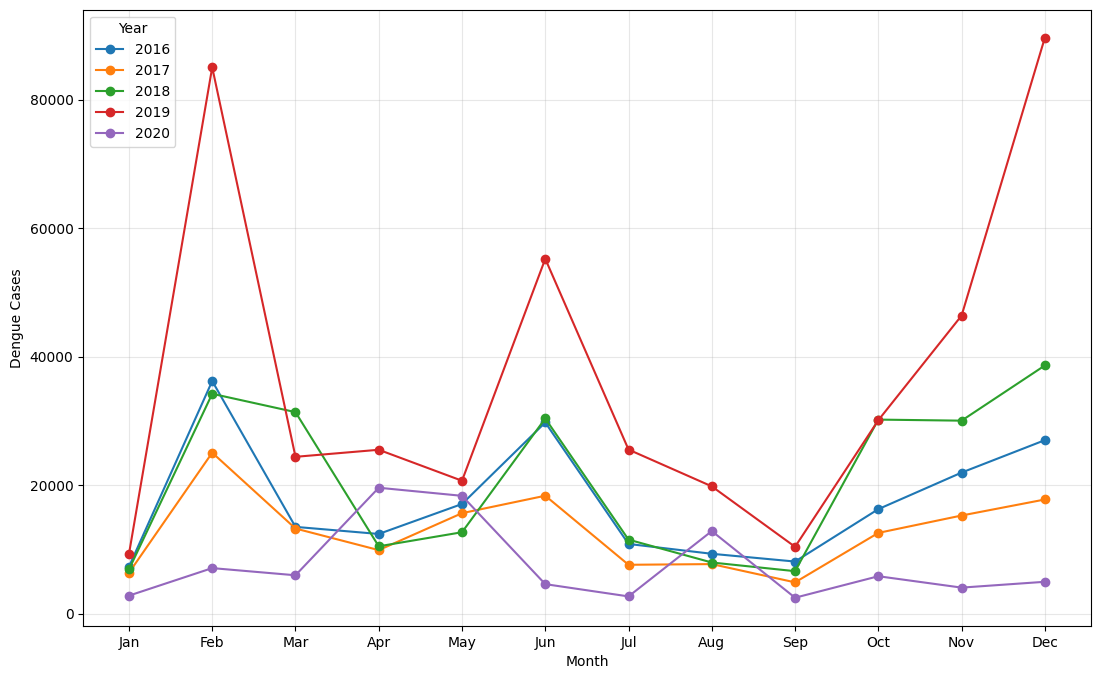

In [26]:
dengue_trend = df.groupby(['Year', 'Month'])['Dengue_Cases'].sum()
data = dengue_trend.unstack(level = 0)
data.plot(
    marker = 'o',
    figsize=(13, 8),
)
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Dengue Cases')
plt.grid(alpha = 0.3)
plt.show()

## 10. Insight
***
2019 recorded a major dengue outbreak, peaking sharply in February and again in December — far higher than any other year. This suggests a strong seasonal pattern and possible outbreak resurgence toward the year’s end, while 2020 saw a steep decline likely due to pandemic restrictions limiting outdoor exposure.